In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPool2D,ZeroPadding2D,Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [30]:
data_generator=ImageDataGenerator(rescale=1./255,zoom_range=0.4,horizontal_flip=True,validation_split=0.2,rotation_range=50,width_shift_range=0.3,height_shift_range=0.3,shear_range=0.4,fill_mode='nearest')
train=data_generator.flow_from_directory('pet_train/',target_size=(200,200),batch_size=50,class_mode='binary')

Found 8228 images belonging to 2 classes.


In [31]:
test=data_generator.flow_from_directory('pet_test/',target_size=(200,200),batch_size=50,class_mode='binary')


Found 1174 images belonging to 2 classes.


In [32]:
model=Sequential()
model.add(Conv2D(32,(3,3),
                 activation='relu',
                 input_shape=(200,200,3)
                 ,padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))


In [33]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 320000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 320000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │       320,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,897 (1.22 MB)

 Trainable params: 320,897 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
import os
from PIL import Image

folder_path = 'pet_train/'
extensions = []

for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {} **'.format(file_path), end="\r", flush=True)
        try:
            im = Image.open(file_path)
            rgb_im = im.convert('RGB')
            ext = filee.split('.')[-1].lower()
            if ext not in extensions:
                extensions.append(ext)
        except Exception as e:
            print(f"\n error: {file_path} — {e}")

In [35]:
model.compile(optimizer=Adam(),  loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
history=model.fit(train,steps_per_epoch=len(train),epochs=30,validation_data=test,validation_steps=len(test))

Epoch 1/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 101s 612ms/step - accuracy: 0.5479 - loss: 0.9991 - val_accuracy: 0.5775 - val_loss: 0.6424
Epoch 2/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 56s 334ms/step - accuracy: 0.5805 - loss: 0.6641 - val_accuracy: 0.6039 - val_loss: 0.6386
Epoch 3/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 54s 327ms/step - accuracy: 0.6040 - loss: 0.6548 - val_accuracy: 0.6278 - val_loss: 0.6276
Epoch 4/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 55s 332ms/step - accuracy: 0.6067 - loss: 0.6538 - val_accuracy: 0.6235 - val_loss: 0.6232
Epoch 5/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 55s 333ms/step - accuracy: 0.6108 - loss: 0.6516 - val_accuracy: 0.6491 - val_loss: 0.6379
Epoch 6/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 57s 344ms/step - accuracy: 0.6063 - loss: 0.6573 - val_accuracy: 0.5707 - val_loss: 0.6667
Epoch 7/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 61s 368ms/step - accuracy: 0.6161 - loss: 0.6488 - val_accuracy: 0.5681 - val_loss: 0.6666
Epoch 8/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 56s 337ms/step - accuracy: 0.6110 - loss: 

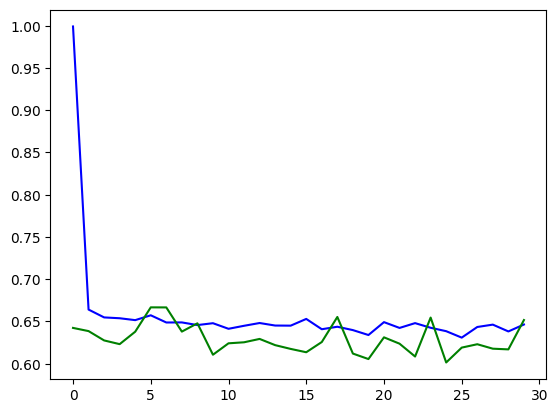

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='blue',label="train data")
plt.plot(history.history['val_loss'],color='green',label="validation data")

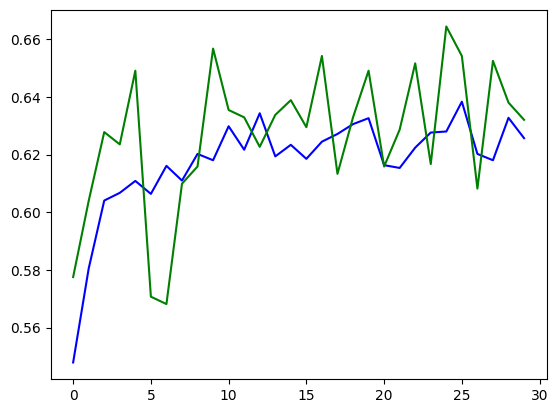

In [38]:
plt.plot(history.history['accuracy'], color='blue', label="train data")
plt.plot(history.history['val_accuracy'], color='green', label="validation data")

In [39]:
model.save("cat_dog.keras")